In [42]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [43]:
import numpy as np
import pandas as pd

In [152]:
import datetime as dt
from pprint import pprint

# Reflect Tables into SQLAlchemy ORM

In [45]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [46]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [47]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [48]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [49]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [50]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

Text(0.5, 1.0, 'Prcp for One Year')

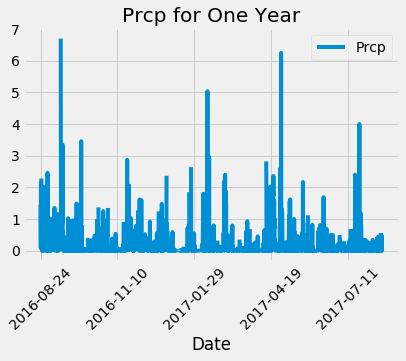

In [125]:
###Design a query to retrieve the last 12 months of precipitation data and plot the results###


# Calculate the date 1 year ago from the last data point in the database
lastdate = session.query(func.max(measurement.date)).all()[0][0]
lastdate = dt.datetime.strptime(lastdate, '%Y-%m-%d')
# print(lastdate)
year_ago_date = lastdate - dt.timedelta(365)
# print(year_ago_date)


# Perform a query to retrieve the data and precipitation scores
year_data = session.query(measurement.date, measurement.prcp)\
                    .filter(measurement.date >= year_ago_date)\
                    .order_by(measurement.date.desc()).all()
# print(year_data)


# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(year_data, columns = ['Date', 'Prcp'])

# Sort the dataframe by date
prcp_df.sort_values(by = ["Date"], ascending = True, inplace = True)


# Use Pandas Plotting with Matplotlib to plot the data
prcp_plot = prcp_df.plot(x = 'Date', y = 'Prcp')
plt.xticks(rotation = 45)
plt.title('Prcp for One Year')


# engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()
# inspector = inspect(engine)
# columns = inspector.get_columns('measurement')
# for c in columns:
#     print(c['name'], c["type"])

In [136]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()
# prcp_df.mean()
# prcp_df.median()

,Prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [141]:
# Design a query to show how many stations are available in this dataset?
number_of_stations = session.query(station).count()
print(f'There are {number_of_stations} stations in this dataset.')

There are 9 stations in this dataset.


In [160]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
most_active_stations = (session.query(measurement.station, func.count(measurement.id))\
                                .group_by(measurement.station)\
                                .order_by(func.count(measurement.station).desc()).all())
pprint(most_active_stations)


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]


In [176]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
low = (session.query(func.min(measurement.tobs)).filter(measurement.station == 'USC00519281')).all()[0][0]
# print(low)
print(f'The lowest temp recorded was {low} degrees.')
high = (session.query(func.max(measurement.tobs)).filter(measurement.station == 'USC00519281')).all()[0][0]
# print(high)
print(f'The highest temp recorded was {high} degrees.')
avg = (session.query(func.avg(measurement.tobs)).filter(measurement.station == 'USC00519281')).all()[0][0]
avg = round(avg, 2)
print(f'The avergage temp recorde was {avg} degrees.')

The lowest temp recorded was 54.0 degrees.
The highest temp recorded was 85.0 degrees.
The avergage temp recorde was 71.66 degrees.


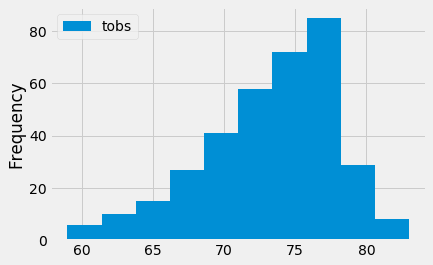

In [194]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active_station = (session.query(measurement.date, measurement.tobs).filter(measurement.date >= year_ago_date)\
                                                                   .filter(measurement.station == 'USC00519281')\
                                                                   .order_by(measurement.date.desc()).all())
active_station_df = pd.DataFrame(active_station)

active_station_df.plot.hist()

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
